# <font  color = 'orange'> **Aplicando métodos no supervisados** </font>


##   <font  color = 'orange'>  1. Configuracion del ambiente  </font>

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier

drive.mount('/content/drive/')

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid", palette="twilight")


path = '/content/drive/MyDrive/data sets/bootcamp/challenge/'

Mounted at /content/drive/


## <font  color = 'orange'> 2. Obtencion de los datos  </font>
---

In [ ]:
name = 'media prediction and its cost.csv'
data = pd.read_csv(path + name)
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

> Inicialmente no contamos con valores nulos.

### <font  color = 'orange'> Traduciendo los datos </font>
---

Creando una funcion que regresa un DataFrame con los datos traducidos.

In [ ]:
import sys
sys.path.append(path)
import diccionarios

def traduccion_datos(data):

  data_copy = data.copy()
  # Renombrando columnas
  data_copy.rename(columns = diccionarios.columnas, inplace= True)
  # Traduccion de las variables categóricas
  columnas_nombres = data_copy.select_dtypes('object').columns
  for columna in columnas_nombres:
    if hasattr(diccionarios, columna):
      diccionario = getattr(diccionarios, columna)
      data_copy[columna] = data_copy[columna].map(diccionario)

  return data_copy

In [ ]:
data_copy = traduccion_datos(data)
data_copy.sample(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,hijos_en_casa,promedio_autos(aprox)_1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,tipo_tienda,ciudad_tienda,estado_tienda,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
42846,Alimentos para el desayuno,Alimentos congelados,Comida,2.04,0.8976,4.0,Venta de un día,Estados Unidos,Soltero,Femenino,4.0,Primaria,NaN,Obrero,No,1.0,20000,0.0,1.0,PigTail,0.51,14.7,12.6,0.0,0.0,26.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,Cupón en la tienda,93.07
29304,Carne,Charcutería,Comida,5.34,1.9224,3.0,Días de liquidación de estanterías,Estados Unidos,Casado,Masculino,3.0,Superior,Oro,Profesional,Sí,3.0,40000,3.0,3.0,Lake,1.78,14.4,13.3,0.0,1.0,6.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Periódico diario, radio",76.41
10909,Productos lácteos,Productos lácteos,Comida,14.36,5.7440,4.0,Venta de un día,Estados Unidos,Soltero,Masculino,3.0,Técnico,Bronce,Cargo de Oficina,No,3.0,40000,0.0,3.0,Gorilla,3.59,13.1,10.1,1.0,1.0,24.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio, televisión",85.88


> Los datos se han traducido de manera correcta!

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

>Después de haber realizado la correspondiente traducción notamos que ahora la columna *miembros* posee valores nulos.

Checando posible columna repetida

In [ ]:
(data_copy['promedio_autos(aprox)_1'] == data_copy['promedio_autos(aprox)']).sum() == data_copy.shape[0]

True

In [ ]:
data_copy.drop(columns=['promedio_autos(aprox)_1'], inplace=True)

Guardamos despues de haber traducido el conjunto de datos.

In [ ]:
data_copy.to_csv(path+'datos_clientes.csv', index=False)

## <font  color = 'orange'> 3. Análisis exploratorio </font>
---


### Visualizando los datos

In [ ]:
datos = pd.read_csv(path + 'datos_clientes.csv')

In [ ]:
def plot_count(data, x:str, hue= '',per = True, fs_per=12):

  title = f'Total de {hue.capitalize()} por {x.capitalize()}' if len(hue)> 0 else  f'Total por {x.capitalize()}'
  hue_tmp = None if len(hue) == 0 else hue

  plt.figure(figsize=(16,6))
  grafico = sns.countplot(data=datos, x = x, hue=hue_tmp)
  grafico.set_title(title, fontsize = 14)
  grafico.set_xlabel(f'{x.capitalize()}', fontsize=12)
  grafico.set_ylabel('Total', fontsize = 12)

  if per == True:
    sizes = []
    for p in grafico.patches:
      if p.get_height() > 0:
        height = p.get_height()
        sizes.append(height)
        grafico.text(p.get_x() + p.get_width()/1.85, height + 200,
                      f'{round(100*height/len(datos),2)}%',
                      ha = 'center', va= 'bottom', fontsize = fs_per)
    grafico.set_ylim(0,max(sizes)*1.2)

  grafico;

In [ ]:
def plot_ingreso(data, x:str,y='ingreso_anual', hue= '',per = True, fs_per=12):
  # Añadir un posible filtro de datos

  title = f'Media Ingreso Anual de {hue.capitalize()} por {x.capitalize()}' if len(hue)> 0 else  f'Media Ingreso Anual por {x.capitalize()}'
  hue_tmp = None if len(hue) == 0 else hue

  plt.figure(figsize=(16,6))
  grafico = sns.barplot(data=datos, x = x, y = 'ingreso_anual', hue=hue_tmp, errorbar=None)
  grafico.set_title(title, fontsize = 14)
  grafico.set_xlabel(f'{x.capitalize()}', fontsize=12)
  grafico.set_ylabel('Total', fontsize = 12)

  if per == True:
    sizes = []
    for p in grafico.patches:
      if p.get_height() > 0:
        height = p.get_height()
        sizes.append(height)
        grafico.text(p.get_x() + p.get_width()/1.85, height + 500,
                      f'{round(height,2)}',
                      ha = 'center', va= 'bottom', fontsize = fs_per)
    grafico.set_ylim(0,max(sizes)*1.2)

  grafico;

#### 1. Analizando por país

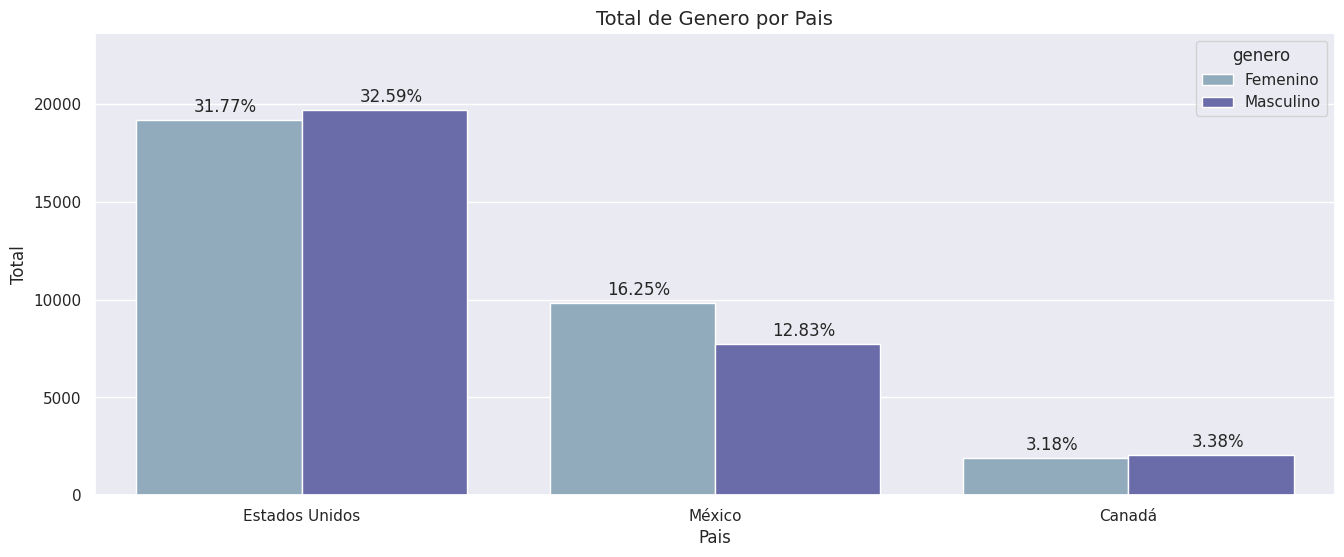

In [ ]:
plot_count(datos, 'pais', 'genero')

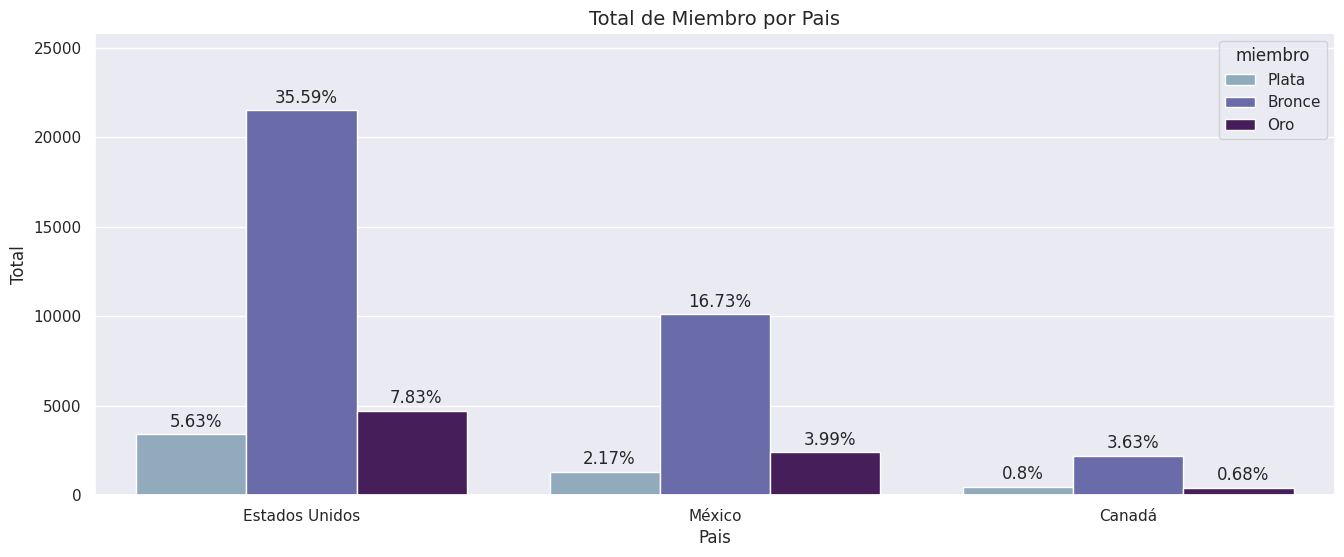

In [ ]:
plot_count(datos, 'pais', 'miembro')

> Del grafico observamos los siguiente:
> * EUA concentra cerca del $50\%$ del total de los datos, siendo el
  que mayor prdomina entre México y Canadá.
> * Los miembros bronce son quienes mayor predominan en los tres paises.



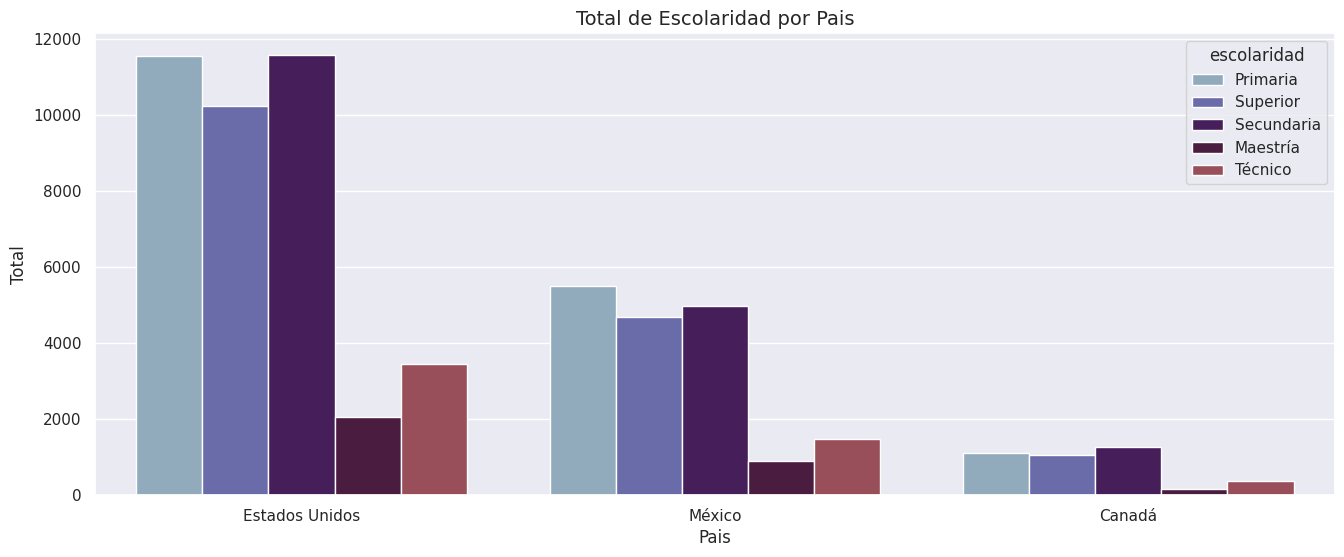

In [ ]:
plot_count(datos, 'pais', 'escolaridad', 10)

> Notamos que en los tres paises las escolaridades *Primaria, Superior* y *Secundaria* son las que predominan en los tres paises.  

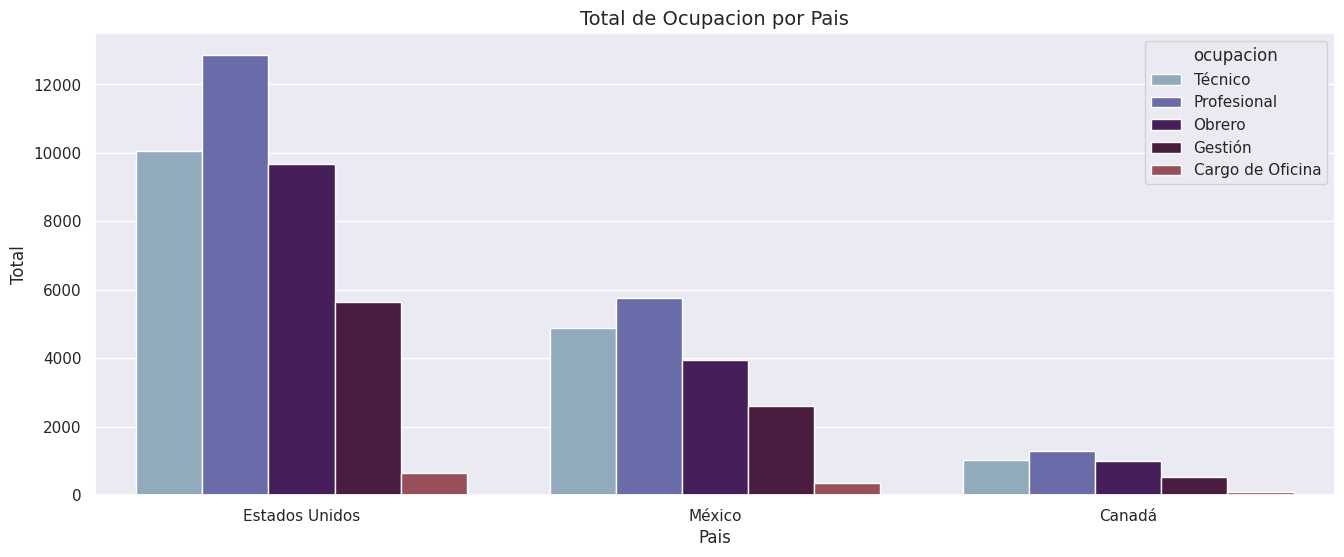

In [ ]:
plot_count(datos,'pais', 'ocupacion',11)

> Notamos que hay tres ocupaciones que predominan en los tres paises: *técnico, profesional* y *obrero*.

#### Analizando por miembro

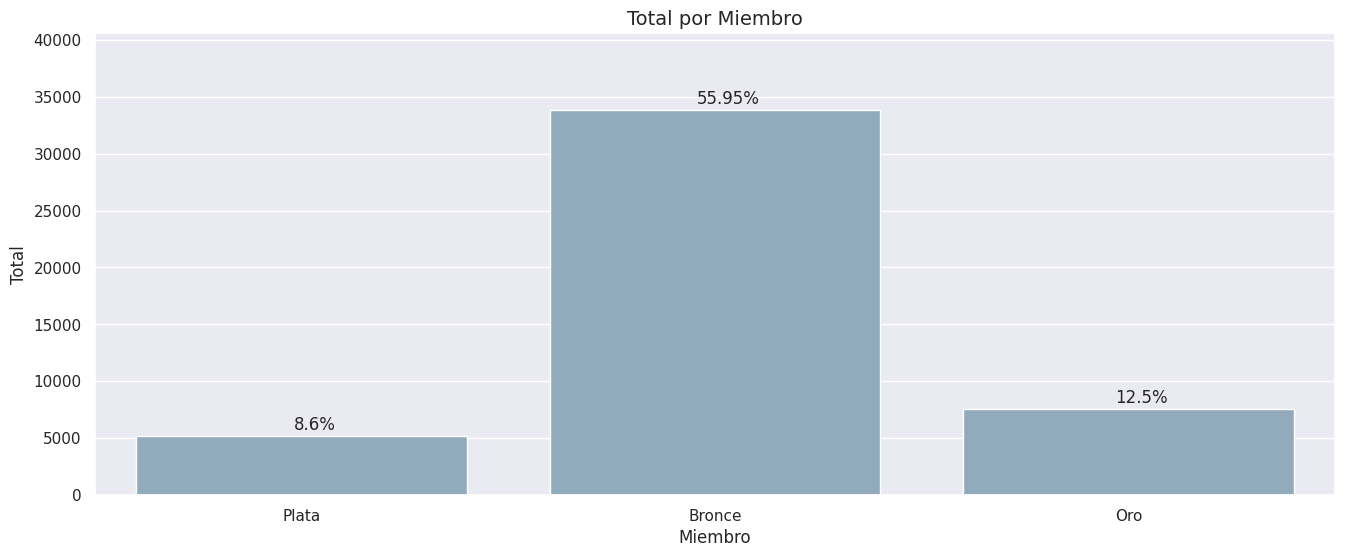

In [ ]:
plot_count(datos, 'miembro')

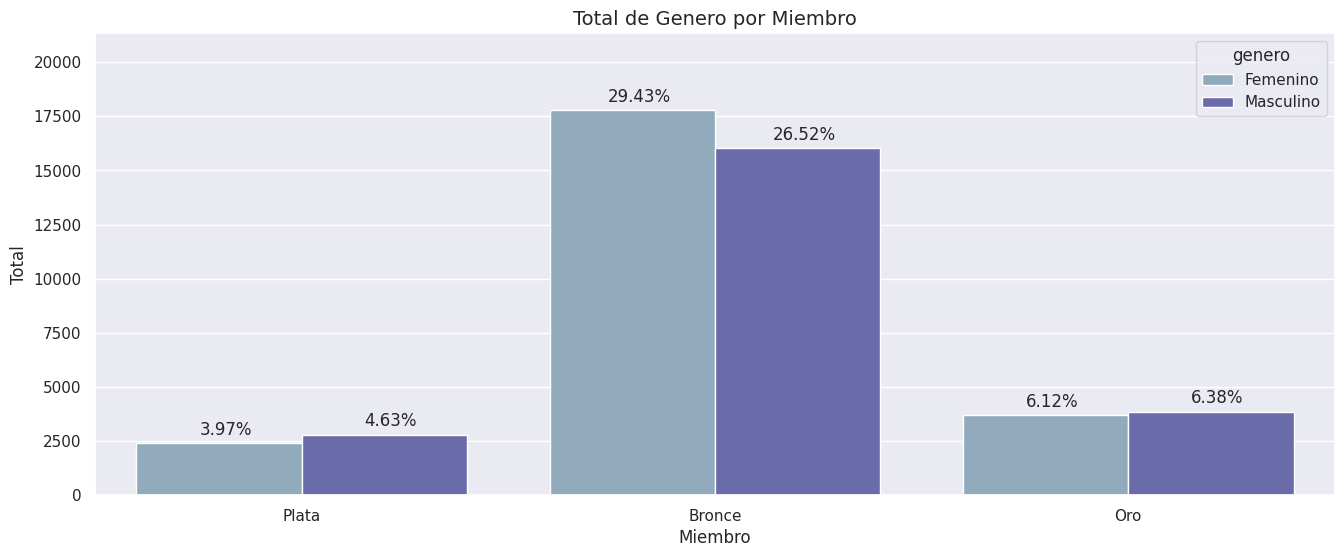

In [ ]:
plot_count(datos, 'miembro', 'genero')

> De aqui podemos notar que para los tres tipos de miembros hay un equilibrio entre el género

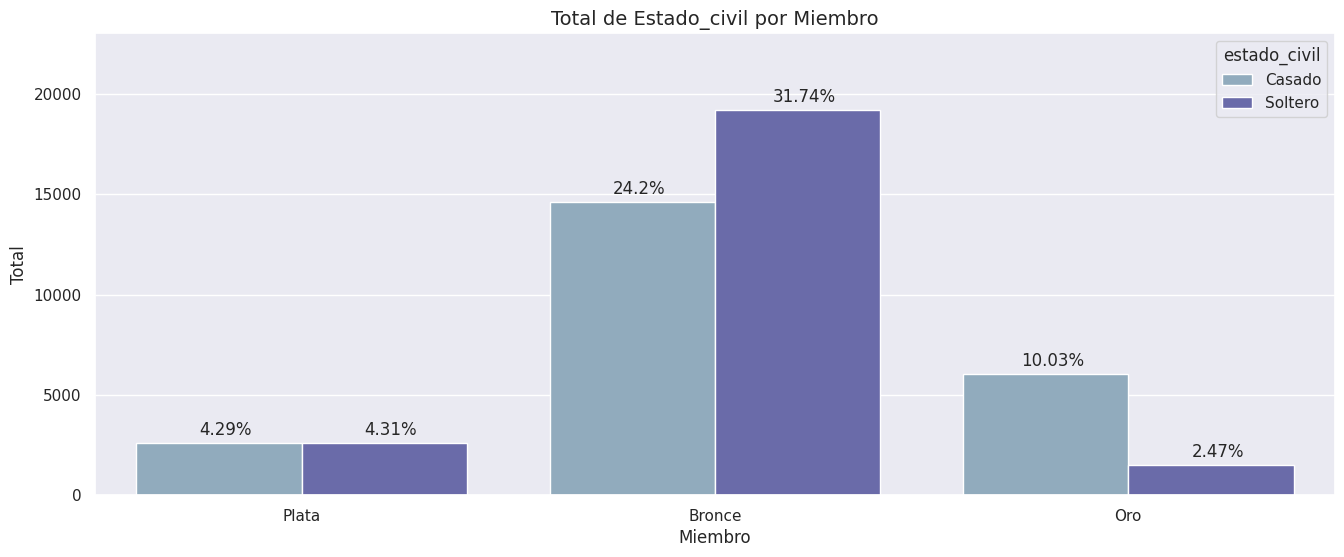

In [ ]:
plot_count(datos, 'miembro', 'estado_civil')

> Notamos lo siguiente:
  * Los solteros(as) son los que mayor predominan en los miembros *bronce*.
  * Los casados son mayoria en los miembros *Oro*.
  * Hay un equilibrio entre casados y solteros en los miembros *Plata*.

#### Analizando por ingreso

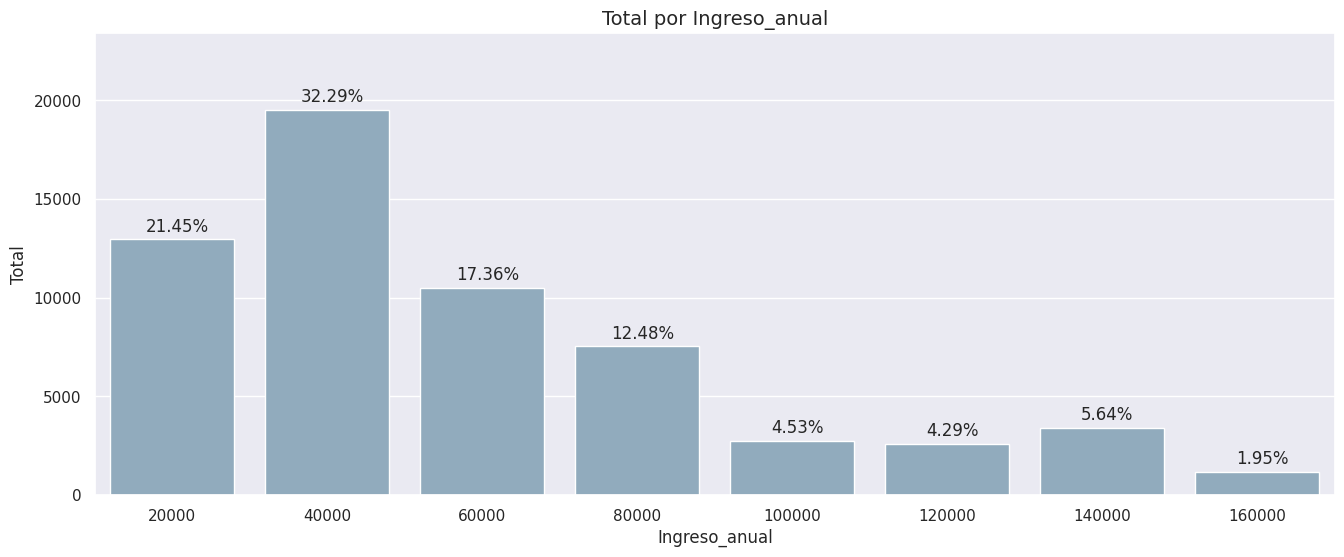

In [ ]:
plot_count(datos, 'ingreso_anual')

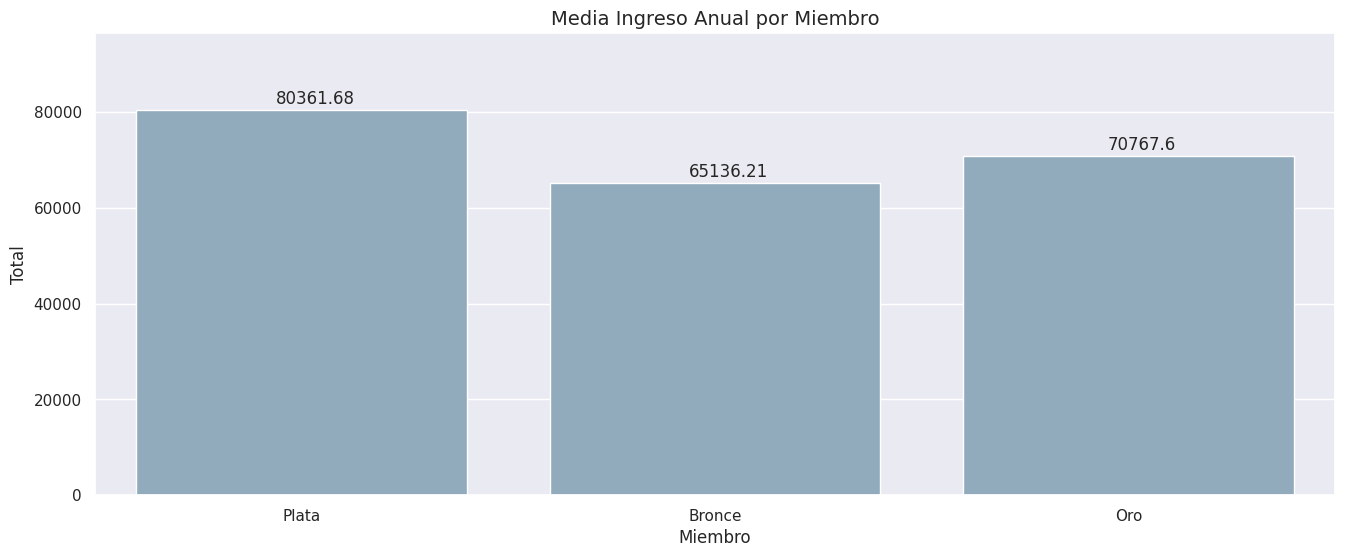

In [ ]:
plot_ingreso(datos, x = 'miembro')

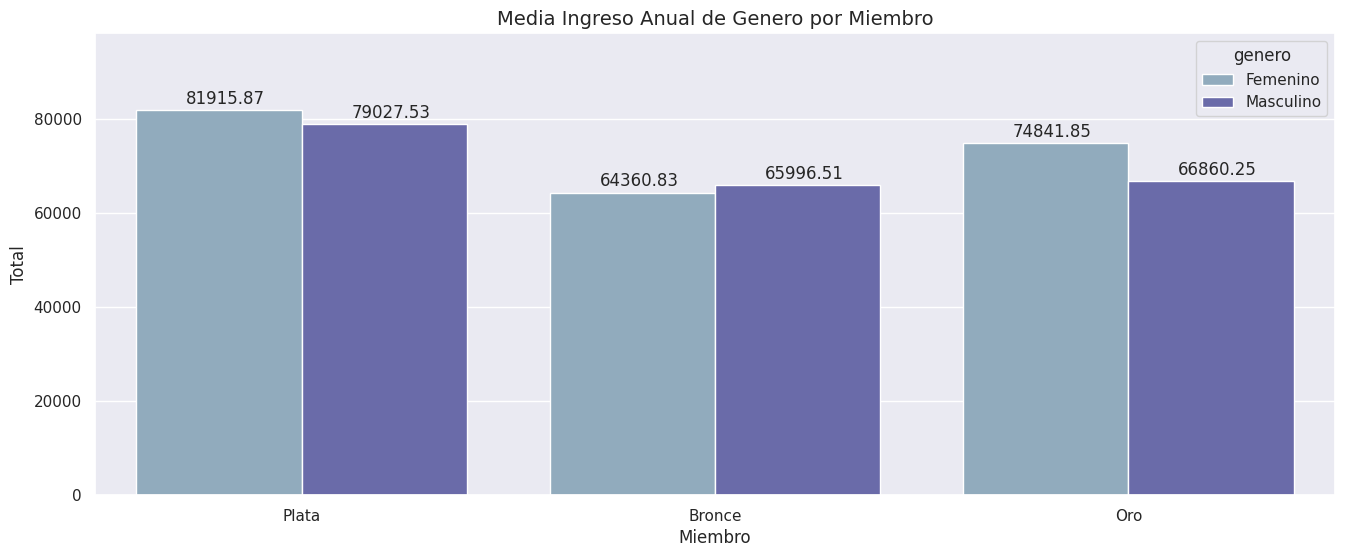

In [ ]:
plot_ingreso(datos, x = 'miembro', hue = 'genero')

> Notamos que la media de la brecha salarial entre los dos géneros no es tan alta

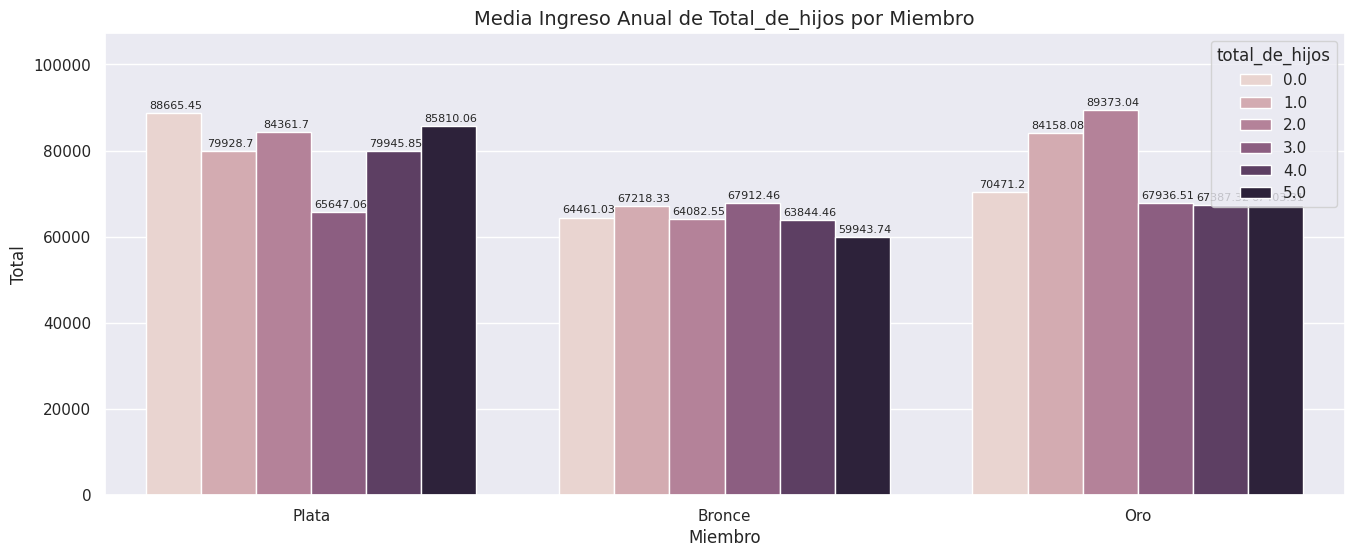

In [ ]:
plot_ingreso(datos, x = 'miembro', hue = 'total_de_hijos', fs_per = 8)

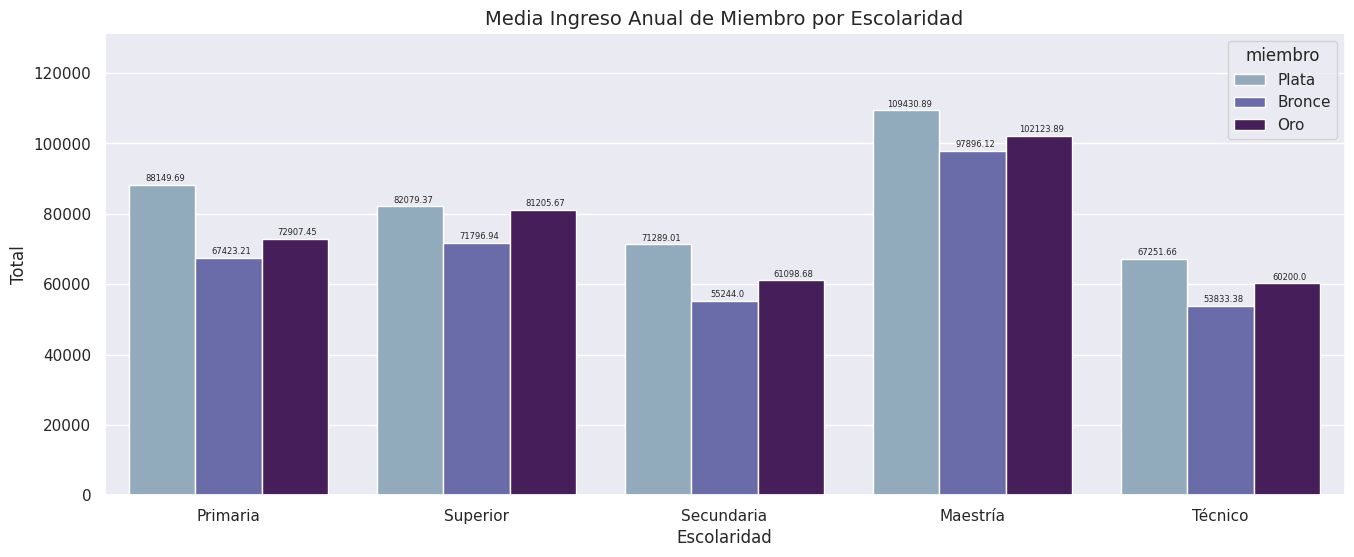

In [ ]:
plot_ingreso(datos, x = 'escolaridad', hue = 'miembro', fs_per=6)

> Notamos que los salarios entre escolaridad son similares

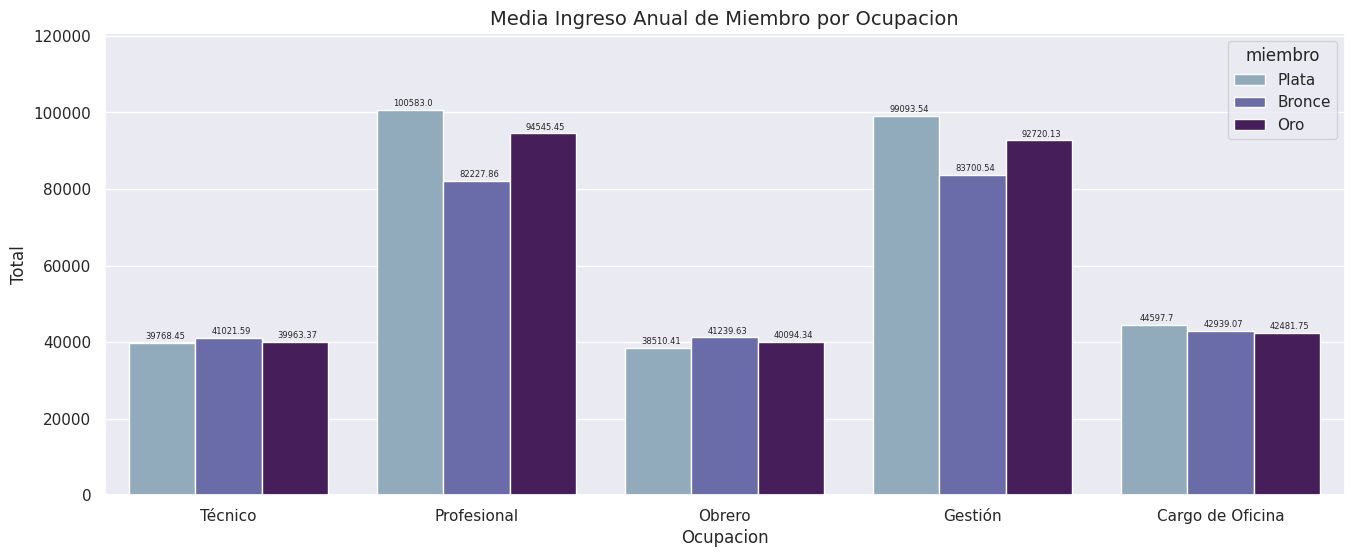

In [ ]:
plot_ingreso(datos, x = 'ocupacion', hue = 'miembro', fs_per=6)

## <font  color = 'orange'>  4. Prepocesamiento de Datos y Obtención de Features </font>
---

### <font  color = 'orange'>  Seleccionando posibles variables para el procesamiento </font>


In [2]:
datos = pd.read_csv(path + 'datos_clientes.csv')

In [3]:
datos.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,hijos_en_casa,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,tipo_tienda,ciudad_tienda,estado_tienda,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,NaN,Técnico,Sí,1.0,20000,1.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,NaN,Obrero,No,1.0,20000,0.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16


Por el momento almacenamos todas las variables categoricas que se encuentran en el conjunto de datos.

---
Veamos la cantidad de variables para cada variable categorica


In [4]:
variables_categoricas = datos.select_dtypes(include = 'object').columns.to_list()
def imprime_num_variable_categoricas():
  for var in variables_categoricas:
    print(f'Total de variables para la variable categorica "{var}": {len(set(datos[var].values))}')
imprime_num_variable_categoricas()

Total de variables para la variable categorica "categoria_alimento": 45
Total de variables para la variable categorica "departamento": 22
Total de variables para la variable categorica "tipo": 3
Total de variables para la variable categorica "promocion": 48
Total de variables para la variable categorica "pais": 3
Total de variables para la variable categorica "estado_civil": 2
Total de variables para la variable categorica "genero": 2
Total de variables para la variable categorica "escolaridad": 5
Total de variables para la variable categorica "miembro": 4
Total de variables para la variable categorica "ocupacion": 5
Total de variables para la variable categorica "vivienda_propia": 2
Total de variables para la variable categorica "marca": 111
Total de variables para la variable categorica "tipo_tienda": 5
Total de variables para la variable categorica "ciudad_tienda": 19
Total de variables para la variable categorica "estado_tienda": 10
Total de variables para la variable categorica "d

> Podriamos descartar las siguientes variables categoricas:
  * categoria alimento
  * departamento
  * promocion
  * marca
  * escolaridad (por no haber una brecha salarial muy fuerte)
  * ciudad_tienda (depende del estado)
  * estado_tienda (depende del pais)

In [5]:
# Aqui se seleccionaran aquellas variables numericas que parecen estar relacionadas al cliente y su compra
variables_numericas = ['hijos_en_casa',
                      'ingreso_anual']

In [6]:
remover = ['categoria_alimento', 'departamento', 'promocion', 'marca', 'escolaridad',
           'ciudad_tienda', 'estado_tienda', 'divulgacion']
for item in remover:
  if item in variables_categoricas:
    variables_categoricas.remove(item)
print(f'Total de variables categoricas: {len(variables_categoricas)}')

Total de variables categoricas: 8


In [7]:
imprime_num_variable_categoricas()

Total de variables para la variable categorica "tipo": 3
Total de variables para la variable categorica "pais": 3
Total de variables para la variable categorica "estado_civil": 2
Total de variables para la variable categorica "genero": 2
Total de variables para la variable categorica "miembro": 4
Total de variables para la variable categorica "ocupacion": 5
Total de variables para la variable categorica "vivienda_propia": 2
Total de variables para la variable categorica "tipo_tienda": 5


---
Creamos el DataFrame en el cual haremos el Encoding y posteriormente realizar la correspondiente segmentacion

In [8]:
variables = variables_categoricas + variables_numericas
variables

['tipo',
 'pais',
 'estado_civil',
 'genero',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'tipo_tienda',
 'hijos_en_casa',
 'ingreso_anual']

Eliminamos los elementos nulos antes del encoding

In [61]:
datos_segmento = datos[variables]
datos_segmento = datos_segmento.dropna(axis=0)
datos_segmento.shape[0]

46561

Le agregamos un poco de realismo al dataset

Tambien eliminamos filas repetidos

In [62]:
datos_segmento = datos_segmento.drop_duplicates()
datos_segmento.shape[0]

4898

### <font  color = 'orange'>  Codificación de Variables categoricas </font>


In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [13]:
dict_encoding =  {'tipo': (0,['Comida', 'No comestible', 'Bebida']),
 'pais': (0,['México', 'Canadá', 'Estados Unidos']),
 'estado_civil': (1,['Soltero', 'Casado']),
 'genero': (1,['Femenino', 'Masculino']),
 'miembro': (1,['Bronce','Plata', 'Oro']),
 'ocupacion': (1,['Obrero', 'Técnico','Cargo de Oficina','Gestión','Profesional']),
 'vivienda_propia': (1,['No', 'Sí']),
 'tipo_tienda': (1,['Pequeño supermercado', 'Supermercado mediano', 'Supermercado','Supermercado gourmet', 'Supermercado de lujo'])
  }

> El valor 0 y 1 de la celda anterior representa los siguiente:
* 0 ----> One Hot Encoder
* 1 ----> Ordinal Encoder

In [58]:
def encoding_variables(dict_encoding):
  data_encoding = pd.DataFrame()
  for key, value in dict_encoding.items():
    encoder = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas') if value[0] == 0 else OrdinalEncoder(categories=[value[1]]).set_output(transform = 'pandas')
    if value[0] !=0:
      data_encoding[key] = encoder.fit_transform(datos_segmento[[key]])
    else:
      df_tmp = encoder.fit_transform(datos_segmento[[key]])
      data_encoding = pd.concat([data_encoding, df_tmp], axis=1)
  return data_encoding

In [59]:
df_encoding = encoding_variables(dict_encoding)
df_encoding.sample(5)

,tipo_Bebida,tipo_Comida,tipo_No comestible,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil,genero,miembro,ocupacion,vivienda_propia,tipo_tienda
8268,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0
22373,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13868,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0
52868,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
13445,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0


In [63]:
datos_segmento.drop(columns=list(dict_encoding.keys()), inplace=True)
datos_segmento = pd.concat([datos_segmento, df_encoding], axis=1, ignore_index=False).reset_index(drop=True)
datos_segmento.head(5)

,hijos_en_casa,ingreso_anual,tipo_Bebida,tipo_Comida,tipo_No comestible,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil,genero,miembro,ocupacion,vivienda_propia,tipo_tienda
0,0.0,60000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,4.0
1,2.0,40000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
2,0.0,40000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0
3,2.0,60000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,4.0
4,0.0,40000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0


Nos querdamos con los variables ya codificadas.

In [64]:
datos_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hijos_en_casa        4898 non-null   float64
 1   ingreso_anual        4898 non-null   int64  
 2   tipo_Bebida          4898 non-null   float64
 3   tipo_Comida          4898 non-null   float64
 4   tipo_No comestible   4898 non-null   float64
 5   pais_Canadá          4898 non-null   float64
 6   pais_Estados Unidos  4898 non-null   float64
 7   pais_México          4898 non-null   float64
 8   estado_civil         4898 non-null   float64
 9   genero               4898 non-null   float64
 10  miembro              4898 non-null   float64
 11  ocupacion            4898 non-null   float64
 12  vivienda_propia      4898 non-null   float64
 13  tipo_tienda          4898 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 535.8 KB


## Visualizando matriz de correlación


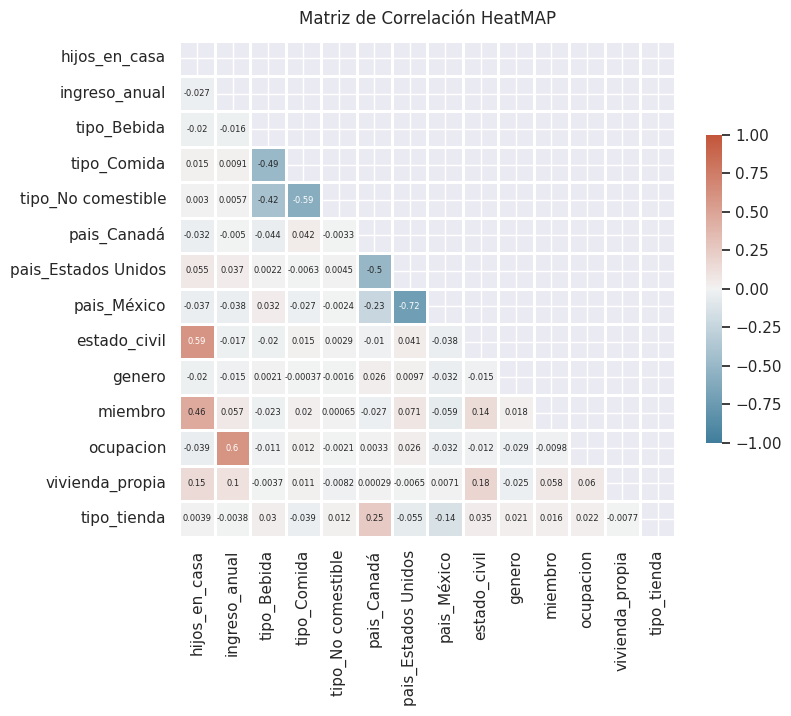

In [69]:
# Visualizando la matriz de correlacion entre las variables
columns = datos_segmento.columns.to_list()
corr = datos_segmento.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1,vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5},annot=True,
                      annot_kws={"size": 6})

heatmap.set_title('Matriz de Correlación HeatMAP', fontdict={'fontsize':12}, pad=12);
